In [60]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import os

In [4]:
np.random.seed

<function RandomState.seed>

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dirt = "C:/Users/Xing/Desktop/ML/D1/bank-additional/"
bank = pd.read_csv(dirt + 'BAF.csv', delimiter=';')

In [20]:
bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [24]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [31]:
#Group the age into several classes
age = bank['age']
alist = list(age)
length = len(alist)

for i in range(0,length):
    if alist[i] <21:
        alist[i]=0
    elif alist[i]<30:
        alist[i]=1
    elif alist[i]<45:
        alist[i]=2
    elif alist[i] <60:
        alist[i]=3
    elif alist[i]<75:
        alist[i]=4
    else:
        alist[i]=5       
age_encoder = pd.Series(alist)
bank1= bank.reset_index()
bank1['age_grp']=age_encoder

In [32]:
bank1.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_grp
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3


In [50]:
bank1.dropna(inplace=True)
bank1['job']=bank1['job'].astype('category')
bank1['marital']=bank1['marital'].astype('category')
bank1['education']=bank1['education'].astype('category')
bank1['default']=bank1['default'].astype('category')
bank1['housing']=bank1['housing'].astype('category')
bank1['loan']=bank1['loan'].astype('category')
bank1['contact']=bank1['contact'].astype('category')
bank1['month']=bank1['month'].astype('category')
bank1['day_of_week']=bank1['day_of_week'].astype('category')
bank1['poutcome']=bank1['poutcome'].astype('category')
bank1['age_grp']=bank1['age_grp'].astype('category')
bank1['y']=bank1['y'].astype('category')

del bank1['index']
del bank1['age']
del bank1['campaign']
del bank1['pdays']
del bank1['previous']



KeyError: 'index'

In [51]:
del bank1['duration']

In [52]:
bank1.dtypes

job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
age_grp           category
dtype: object

In [45]:
bank1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [46]:
bank1.shape

(41188, 22)

In [54]:
Xcols=['job','marital','education','default','housing','loan','contact','poutcome','age_grp']
Ycol = ['y']
Xcols=bank1[Xcols]
Xcols=pd.get_dummies(Xcols)
Xcols.dtypes

job_admin.                       uint8
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student                      uint8
job_technician                   uint8
job_unemployed                   uint8
job_unknown                      uint8
marital_divorced                 uint8
marital_married                  uint8
marital_single                   uint8
marital_unknown                  uint8
education_basic.4y               uint8
education_basic.6y               uint8
education_basic.9y               uint8
education_high.school            uint8
education_illiterate             uint8
education_professional.course    uint8
education_university.degree      uint8
education_unknown                uint8
default_no                       uint8
default_unknown          

In [57]:
Y=bank1[Ycol]

In [56]:
X = pd.concat([Xcols], axis=1)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [62]:
feature_names=X.columns
print (feature_names)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'age_grp_0', 'age_grp_1', 'age_grp_2', 'age_grp_3', 'age_grp_4',
       'age_grp_5'],
      dtype='object')


In [64]:
from sklearn import metrics
bank_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=5)
bank_tree.fit(X_train, Y_train)
predictions = bank_tree.predict(X_test)
print(metrics.confusion_matrix(Y_test, predictions))
print("Accuracy Score =", metrics.accuracy_score(Y_test, predictions))

[[9035  121]
 [ 917  224]]
Accuracy Score = 0.8991939399825192


In [65]:
from sklearn.tree import export_graphviz

## Decision Tree Visualization
export_graphviz(
   bank_tree,
   out_file=dirt+"tree1.dot",
   feature_names=feature_names,
   class_names=('0','1','2','3','4','5'),
   rounded=True,
   filled=True)


Feature ranking:
1. feature 37 (0.690496)
2. feature 34 (0.197335)
3. feature 42 (0.062671)
4. feature 24 (0.049498)
5. feature 43 (0.000000)
6. feature 10 (0.000000)
7. feature 17 (0.000000)
8. feature 16 (0.000000)
9. feature 15 (0.000000)
10. feature 14 (0.000000)
11. feature 13 (0.000000)
12. feature 12 (0.000000)
13. feature 11 (0.000000)
14. feature 9 (0.000000)
15. feature 19 (0.000000)
16. feature 8 (0.000000)
17. feature 7 (0.000000)
18. feature 6 (0.000000)
19. feature 5 (0.000000)
20. feature 4 (0.000000)
21. feature 3 (0.000000)
22. feature 2 (0.000000)
23. feature 1 (0.000000)
24. feature 18 (0.000000)
25. feature 21 (0.000000)
26. feature 20 (0.000000)
27. feature 32 (0.000000)
28. feature 41 (0.000000)
29. feature 40 (0.000000)
30. feature 39 (0.000000)
31. feature 38 (0.000000)
32. feature 36 (0.000000)
33. feature 35 (0.000000)
34. feature 33 (0.000000)
35. feature 31 (0.000000)
36. feature 22 (0.000000)
37. feature 30 (0.000000)
38. feature 29 (0.000000)
39. feature 2

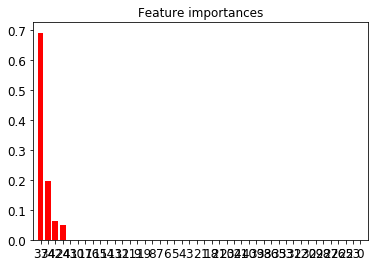

In [66]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
importances = bank_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
